# Restaurant Industry Bankruptcy Analysis and Classification

In [1]:
#Import Library
import pandas as pd
import numpy as np 

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

!kaggle datasets download -d wondermahembe/swedish-restaurant-industry-bankruptcy-dataset

In [2]:
data = pd.read_csv('restaurantdataset.csv')
data

,ORGNR,Year,ZipCode,Municipality,Bankrupt,Business_Category,Size_Category,OperatingProfit,Financial_Income,Financial_Expenses,Internal_FinPerformance,Financ_res_Extent,Profit_AfterExp,Taxes,NetProfit,Intangible FxdA,Machinery&Equipment,Tangible FxdA,Financial_Assets,Total_FxdA,Total_CurrA,Total_Assets,Total_Equity,Untaxed_Reserves,Provisions,Curr_Liabilities,Total_Curr_Liabilities,Non_Curr_Liabilities,Total_Non_curr_lia,Total_Equity&Liab,Net_Sales,Other_Oper_incom,Depreciation,Personnel_Expenses,Comparability_items,Other_oper_exp,Total_appropriations,Employees,Sales_per_Employee,VA_per_Employee,Change_in_Sales,Inventory,Salaries,Value_Added,Social_Security,Total_Inventories,Total_receivables,Securities_Investments,CashnBank,Dividend,Production_Costs,rr08d_resand,rr08a_rteinknc,rr08b_rteinext,rr08c_rteinov,rr09a_rtekoknc,rr09b_rtekoext,rr09c_rtekoov,rr13a_extraint,rr13b_extrakos,rr13c_kncbdr,rr13d_agtsk,rr13e_bsldisp,br02a_byggmark,br02b_matanlov,br01a_foubautg,br01b_patlic,br01c_goodwill,br01d_imanlov,br04a_andknc,br04b_lfordknc,br04c_landelag,br04d_fianltov,br06a_pagarb,br06b_lagerov,br06d_kundford,br06e_kfordknc,br06f_kfordov,br10a_aktiekap,br10b_overkurs,br10c_uppskr,br10d_ovrgbkap,Accumulated_profit,br10f_kncbdrel,br10g_agtskel,br10h_resarb,br13a_ksklev,br13b_kskknc,br13c_kskov,br15a_lskknc,br15b_lskov,Asset_Turnover_ratio,ROA,Interest_on_Debt,Debt_to_Equity,Equity_to_Assets,ROE,WC_to_Sales,Quick_ratio,Operating_Margin,Net_Margin,Profit_Margin
0,5560024712,1998,23163,1287.0,0,30,2,-558.0,358,-379,348,-369,-579.0,0.0,-579,0.0,344.0,5344.0,1.0,5345.0,673.0,6018,2049.0,0,0,85.0,741.0,3226.0,3226.0,6018.0,2726,50.0,-96,-1535,0,-1703,0,7,389.0,153.0,NaN,513.0,-1138.0,1073,-397.0,53.0,460.0,0.0,160.0,0,-1485.0,0,0,10,348,0,-379,0.0,0,0,0,0,0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,53.0,267.0,0.0,193.0,2200.0,0.0,425.0,3.0,0.0,0.0,0.0,-579.0,95.0,0.0,561.0,0.0,0.0,0.452974,-0.033234,0.095490,1.937042,0.340479,-0.282577,-0.024945,0.836707,-0.204696,-0.212399,-0.073368
1,5560024712,1999,23163,1287.0,0,30,2,-634.0,351,-395,348,-392,-679.0,0.0,-679,0.0,258.0,5258.0,1.0,5259.0,850.0,6109,1371.0,0,0,39.0,891.0,3847.0,3847.0,6109.0,2852,60.0,-86,-1818,0,-1642,0,8,357.0,159.0,0.046222,727.0,-1345.0,1270,-473.0,64.0,663.0,0.0,123.0,0,-1408.0,0,0,3,348,0,-395,0.0,0,0,0,0,0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,64.0,443.0,0.0,220.0,1100.0,0.0,0.0,950.0,0.0,0.0,0.0,-679.0,72.0,0.0,780.0,0.0,0.0,0.466852,-0.046325,0.083369,3.455872,0.224423,-0.495259,-0.014376,0.882155,-0.222300,-0.238079,-0.099229
2,5560024712,2000,23163,1287.0,0,30,2,3809.0,230,-280,229,-279,3758.0,-209.0,3259,0.0,195.0,5195.0,93.0,5288.0,4228.0,9515,4630.0,291,0,43.0,722.0,3873.0,3873.0,9515.0,2779,4560.0,-80,-1959,0,-1491,-290,8,347.0,731.0,-0.025596,4063.0,-1472.0,5848,-487.0,65.0,3998.0,0.0,164.0,0,-1655.0,0,0,1,229,0,-280,0.0,0,0,0,0,-290,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,0.0,65.0,350.0,0.0,3648.0,1100.0,0.0,0.0,271.0,0.0,0.0,0.0,3259.0,91.0,0.0,588.0,0.0,0.0,0.292065,0.424488,0.059887,0.966104,0.508620,0.776523,1.261605,5.765928,1.370637,1.352285,1.453401
3,5560024712,2001,23163,1287.0,0,30,2,-1147.0,233,-227,200,-194,-1140.0,0.0,-850,0.0,167.0,5167.0,108.0,5275.0,2422.0,7697,3780.0,0,0,47.0,756.0,3161.0,3161.0,7697.0,2631,24.0,-87,-1996,0,-1718,290,8,329.0,117.0,-0.053257,697.0,-1497.0,936,-499.0,72.0,625.0,1519.0,206.0,0,-1828.0,0,0,33,200,0,-227,0.0,0,0,0,0,290,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0,0.0,72.0,378.0,0.0,247.0,1100.0,0.0,0.0,271.0,3259.0,0.0,0.0,-850.0,74.0,0.0,635.0,0.0,0.0,0.341821,-0.118748,0.057953,1.036243,0.491100,-0.301587,0.633219,3.108466,-0.435956,-0.433295,-0.347396
4,5560024712,2002,23163,1287.0,0,30,2,-1250.0,241,-218,194,-171,-1226.0,0.0,-1226,0.0,150.0,5150.0,76.0,5226.0,803.0,6029,2554.0,0,0,52.0,505.0,2970.0,2970.0,6029.0,2415,13.0,-88,-2089,0,-1501,0,8,302.0,116.0,-0.082098,730.0,-1531.0,927,-558.0,75.0,655.0,0.0,73.0,0,-1508.0,0,0,47,194,0,-218,0.0,0,0,0,0,0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0

In [9]:
dtypes_df = pd.DataFrame(list(zip(data.columns, data.dtypes)), columns=['Column Name', 'Data Type'])
dtypes_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101
Column Name,ORGNR,Year,ZipCode,Municipality,Bankrupt,Business_Category,Size_Category,OperatingProfit,Financial_Income,Financial_Expenses,Internal_FinPerformance,Financ_res_Extent,Profit_AfterExp,Taxes,NetProfit,Intangible FxdA,Machinery&Equipment,Tangible FxdA,Financial_Assets,Total_FxdA,Total_CurrA,Total_Assets,Total_Equity,Untaxed_Reserves,Provisions,Curr_Liabilities,Total_Curr_Liabilities,Non_Curr_Liabilities,Total_Non_curr_lia,Total_Equity&Liab,Net_Sales,Other_Oper_incom,Depreciation,Personnel_Expenses,Comparability_items,Other_oper_exp,Total_appropriations,Employees,Sales_per_Employee,VA_per_Employee,Change_in_Sales,Inventory,Salaries,Value_Added,Social_Security,Total_Inventories,Total_receivables,Securities_Investments,CashnBank,Dividend,Production_Costs,rr08d_resand,rr08a_rteinknc,rr08b_rteinext,rr08c_rteinov,rr09a_rtekoknc,rr09b_rtekoext,rr09c_rtekoov,rr13a_extraint,rr13b_extrakos,rr13c_kncbdr,rr13d_agtsk,rr13e_bsldisp,br02a_byggmark,br02b_matanlov,br01a_foubautg,br01b_patlic,br01c_goodwill,br01d_imanlov,br04a_andknc,br04b_lfordknc,br04c_landelag,br04d_fianltov,br06a_pagarb,br06b_lagerov,br06d_kundford,br06e_kfordknc,br06f_kfordov,br10a_aktiekap,br10b_overkurs,br10c_uppskr,br10d_ovrgbkap,Accumulated_profit,br10f_kncbdrel,br10g_agtskel,br10h_resarb,br13a_ksklev,br13b_kskknc,br13c_kskov,br15a_lskknc,br15b_lskov,Asset_Turnover_ratio,ROA,Interest_on_Debt,Debt_to_Equity,Equity_to_Assets,ROE,WC_to_Sales,Quick_ratio,Operating_Margin,Net_Margin,Profit_Margin
Data Type,int64,int64,int64,float64,int64,int64,int64,float64,int64,int64,int64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,int64,float64,int64,int64,float64,float64,float64,float64,float64,int64,float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,int64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [4]:
data.describe()

,ORGNR,Year,ZipCode,Municipality,Bankrupt,Business_Category,Size_Category,OperatingProfit,Financial_Income,Financial_Expenses,Internal_FinPerformance,Financ_res_Extent,Profit_AfterExp,Taxes,NetProfit,Intangible FxdA,Machinery&Equipment,Tangible FxdA,Financial_Assets,Total_FxdA,Total_CurrA,Total_Assets,Total_Equity,Untaxed_Reserves,Provisions,Curr_Liabilities,Total_Curr_Liabilities,Non_Curr_Liabilities,Total_Non_curr_lia,Total_Equity&Liab,Net_Sales,Other_Oper_incom,Depreciation,Personnel_Expenses,Comparability_items,Other_oper_exp,Total_appropriations,Employees,Sales_per_Employee,VA_per_Employee,Change_in_Sales,Inventory,Salaries,Value_Added,Social_Security,Total_Inventories,Total_receivables,Securities_Investments,CashnBank,Dividend,Production_Costs,rr08d_resand,rr08a_rteinknc,rr08b_rteinext,rr08c_rteinov,rr09a_rtekoknc,rr09b_rtekoext,rr09c_rtekoov,rr13a_extraint,rr13b_extrakos,rr13c_kncbdr,rr13d_agtsk,rr13e_bsldisp,br02a_byggmark,br02b_matanlov,br01a_foubautg,br01b_patlic,br01c_goodwill,br01d_imanlov,br04a_andknc,br04b_lfordknc,br04c_landelag,br04d_fianltov,br06a_pagarb,br06b_lagerov,br06d_kundford,br06e_kfordknc,br06f_kfordov,br10a_aktiekap,br10b_overkurs,br10c_uppskr,br10d_ovrgbkap,Accumulated_profit,br10f_kncbdrel,br10g_agtskel,br10h_resarb,br13a_ksklev,br13b_kskknc,br13c_kskov,br15a_lskknc,br15b_lskov,Asset_Turnover_ratio,ROA,Interest_on_Debt,Debt_to_Equity,Equity_to_Assets,ROE,WC_to_Sales,Quick_ratio,Operating_Margin,Net_Margin,Profit_Margin
count,9.130100e+04,91301.000000,91301.000000,91186.000000,91301.000000,91301.0,91301.000000,91300.000000,91301.000000,91301.000000,91301.000000,91301.000000,91299.000000,91299.000000,91301.000000,91293.000000,91282.000000,91293.000000,91293.000000,91293.000000,91288.000000,91301.000000,91288.000000,91301.000000,91301.000000,91289.000000,91299.000000,91285.000000,91300.000000,91273.000000,91301.000000,91281.000000,91301.000000,91301.000000,91301.000000,91301.000000,91301.000000,91301.000000,82075.000000,82075.000000,81993.000000,91289.000000,91297.000000,91301.000000,91295.000000,91289.000000,91288.000000,91289.000000,91289.000000,91301.000000,90758.000000,91301.000000,91301.000000,91301.000000,91301.000000,91301.000000,91301.000000,91299.000000,91301.000000,91301.000000,91301.000000,91301.000000,91301.000000,91283.000000,91283.000000,91280.000000,91282.000000,91282.000000,91280.000000,91283.000000,91283.000000,91283.000000,91283.000000,91279.000000,91279.000000,91279.000000,91279.000000,91279.000000,91288.000000,91288.000000,91288.000000,91288.000000,91288.000000,91278.000000,91278.000000,91288.000000,91289.000000,91288.000000,91289.000000,91285.000000,91285.000000,91301.000000,91301.000000,91063.000000,76907.000000,76907.000000,76907.000000,91286.000000,90933.000000,91301.000000,91301.000000,91301.000000
mean,5.565178e+09,2007.711876,42912.012596,1056.565438,0.003669,30.0,1.448615,124.344578,24.351300,-37.367564,10.585547,-23.609479,111.370179,-35.874993,67.126165,90.355153,332.470224,631.553799,122.840853,844.739717,873.600583,1718.533948,421.429783,128.280457,4.242878,38.032501,722.990252,256.857655,441.608226,1718.522794,4164.657276,137.970607,-121.264115,-1444.785194,1.671855,-2612.897679,-8.386086,5.359218,756.905391,285.984941,0.801514,405.399336,-1064.659518,1688.656324,-380.197349,109.284131,296.118449,51.904151,416.341991,49.785063,-2549.462593,8.053548,0.006988,5.967372,8.002125,-0.029518,-29.568460,-5.288097,1.171433,-0.473445,-0.084742,2.321147,-11.319493,239.196926,60.017024,1.789034,5.955292,38.985649,43.623817,12.035461,5.820690,0.318318,104.637402,0.457849,108.825327,97.539686,11.063618,187.502328,116.767111,2.617923,5.191723,11.337985,187.570480,0.164552,33.799163,63.983317,196.271763,4.133994,484.605221,11.340943,173.068653,3.931497,0.021078,0.059075,5.450444,0.389631,-0.182280,0.999235,2.356008,-0.111254,-0.003068,0.082331
std,1.549052e+06,6.280128,26668.973813,773.792408,0.060463,0.0,0.926548,680.585449,327.087727,130.475604,329.902211,99.023394,755.781568,119.67

In [15]:
null_df = pd.DataFrame(list(zip(data.columns, data.isnull().sum())), columns=['Column Name', 'NaN Amount'])
null_df.sort_values(by='NaN Amount',ascending = False).T

,96,95,94,40,38,39,50,98,93,3,29,84,83,73,77,76,75,74,65,68,31,67,16,66,64,72,69,70,71,63,27,89,90,97,79,78,80,46,81,85,82,20,22,87,48,41,88,25,47,86,45,15,17,18,19,44,42,57,26,13,12,28,7,99,100,91,92,0,51,62,33,2,4,5,6,8,9,10,11,14,21,23,24,30,32,34,61,35,36,37,43,49,1,52,53,54,55,56,58,59,60,101
Column Name,ROE,Equity_to_Assets,Debt_to_Equity,Change_in_Sales,Sales_per_Employee,VA_per_Employee,Production_Costs,Quick_ratio,Interest_on_Debt,Municipality,Total_Equity&Liab,br10g_agtskel,br10f_kncbdrel,br06a_pagarb,br06f_kfordov,br06e_kfordknc,br06d_kundford,br06b_lagerov,br01a_foubautg,br01d_imanlov,Other_Oper_incom,br01c_goodwill,Machinery&Equipment,br01b_patlic,br02b_matanlov,br04d_fianltov,br04a_andknc,br04b_lfordknc,br04c_landelag,br02a_byggmark,Non_Curr_Liabilities,br15a_lskknc,br15b_lskov,WC_to_Sales,br10b_overkurs,br10a_aktiekap,br10c_uppskr,Total_receivables,br10d_ovrgbkap,br10h_resarb,Accumulated_profit,Total_CurrA,Total_Equity,br13b_kskknc,CashnBank,Inventory,br13c_kskov,Curr_Liabilities,Securities_Investments,br13a_ksklev,Total_Inventories,Intangible FxdA,Tangible FxdA,Financial_Assets,Total_FxdA,Social_Security,Salaries,rr09c_rtekoov,Total_Curr_Liabilities,Taxes,Profit_AfterExp,Total_Non_curr_lia,OperatingProfit,Operating_Margin,Net_Margin,Asset_Turnover_ratio,ROA,ORGNR,rr08d_resand,rr13e_bsldisp,Personnel_Expenses,ZipCode,Bankrupt,Business_Category,Size_Category,Financial_Income,Financial_Expenses,Internal_FinPerformance,Financ_res_Extent,NetProfit,Total_Assets,Untaxed_Reserves,Provisions,Net_Sales,Depreciation,Comparability_items,rr13d_agtsk,Other_oper_exp,Total_appropriations,Employees,Value_Added,Dividend,Year,rr08a_rteinknc,rr08b_rteinext,rr08c_rteinov,rr09a_rtekoknc,rr09b_rtekoext,rr13a_extraint,rr13b_extrakos,rr13c_kncbdr,Profit_Margin
NaN Amount,14394,14394,14394,9308,9226,9226,543,368,238,115,28,23,23,22,22,22,22,22,21,21,20,19,19,19,18,18,18,18,18,18,16,16,16,15,13,13,13,13,13,13,13,13,13,13,12,12,12,12,12,12,12,8,8,8,8,6,4,2,2,2,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Due to the abundance of missing data, especially in the columns ROE, Equity_to_Assets, Debt_to_Equity, Change_in_Sales, Sales_per_Employee, and VA_per_Employee, I am attempting to use the KNN imputer to fill in these gaps.

In [234]:
datan = pd.DataFrame(data_imputed,columns=data.columns)
datan

,ORGNR,Year,ZipCode,Municipality,Bankrupt,Business_Category,Size_Category,OperatingProfit,Financial_Income,Financial_Expenses,Internal_FinPerformance,Financ_res_Extent,Profit_AfterExp,Taxes,NetProfit,Intangible FxdA,Machinery&Equipment,Tangible FxdA,Financial_Assets,Total_FxdA,Total_CurrA,Total_Assets,Total_Equity,Untaxed_Reserves,Provisions,Curr_Liabilities,Total_Curr_Liabilities,Non_Curr_Liabilities,Total_Non_curr_lia,Total_Equity&Liab,Net_Sales,Other_Oper_incom,Depreciation,Personnel_Expenses,Comparability_items,Other_oper_exp,Total_appropriations,Employees,Sales_per_Employee,VA_per_Employee,Change_in_Sales,Inventory,Salaries,Value_Added,Social_Security,Total_Inventories,Total_receivables,Securities_Investments,CashnBank,Dividend,Production_Costs,rr08d_resand,rr08a_rteinknc,rr08b_rteinext,rr08c_rteinov,rr09a_rtekoknc,rr09b_rtekoext,rr09c_rtekoov,rr13a_extraint,rr13b_extrakos,rr13c_kncbdr,rr13d_agtsk,rr13e_bsldisp,br02a_byggmark,br02b_matanlov,br01a_foubautg,br01b_patlic,br01c_goodwill,br01d_imanlov,br04a_andknc,br04b_lfordknc,br04c_landelag,br04d_fianltov,br06a_pagarb,br06b_lagerov,br06d_kundford,br06e_kfordknc,br06f_kfordov,br10a_aktiekap,br10b_overkurs,br10c_uppskr,br10d_ovrgbkap,Accumulated_profit,br10f_kncbdrel,br10g_agtskel,br10h_resarb,br13a_ksklev,br13b_kskknc,br13c_kskov,br15a_lskknc,br15b_lskov,Asset_Turnover_ratio,ROA,Interest_on_Debt,Debt_to_Equity,Equity_to_Assets,ROE,WC_to_Sales,Quick_ratio,Operating_Margin,Net_Margin,Profit_Margin
0,5.560025e+09,1998.0,23163.0,1287.0,0.0,30.0,2.0,-558.0,358.0,-379.0,348.0,-369.0,-579.0,0.0,-579.0,0.0,344.0,5344.0,1.0,5345.0,673.0,6018.0,2049.0,0.0,0.0,85.0,741.0,3226.0,3226.0,6018.0,2726.0,50.0,-96.0,-1535.0,0.0,-1703.0,0.0,7.0,389.0,153.0,-0.018722,513.0,-1138.0,1073.0,-397.0,53.0,460.0,0.0,160.0,0.0,-1485.0,0.0,0.0,10.0,348.0,0.0,-379.0,0.0,0.0,0.0,0.0,0.0,0.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,53.0,267.0,0.0,193.0,2200.0,0.0,425.0,3.0,0.0,0.0,0.0,-579.0,95.0,0.0,561.0,0.0,0.0,0.452974,-0.033234,0.095490,1.937042,0.340479,-0.282577,-0.024945,0.836707,-0.204696,-0.212399,-0.073368
1,5.560025e+09,1999.0,23163.0,1287.0,0.0,30.0,2.0,-634.0,351.0,-395.0,348.0,-392.0,-679.0,0.0,-679.0,0.0,258.0,5258.0,1.0,5259.0,850.0,6109.0,1371.0,0.0,0.0,39.0,891.0,3847.0,3847.0,6109.0,2852.0,60.0,-86.0,-1818.0,0.0,-1642.0,0.0,8.0,357.0,159.0,0.046222,727.0,-1345.0,1270.0,-473.0,64.0,663.0,0.0,123.0,0.0,-1408.0,0.0,0.0,3.0,348.0,0.0,-395.0,0.0,0.0,0.0,0.0,0.0,0.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,64.0,443.0,0.0,220.0,1100.0,0.0,0.0,950.0,0.0,0.0,0.0,-679.0,72.0,0.0,780.0,0.0,0.0,0.466852,-0.046325,0.083369,3.455872,0.224423,-0.495259,-0.014376,0.882155,-0.222300,-0.238079,-0.099229
2,5.560025e+09,2000.0,23163.0,1287.0,0.0,30.0,2.0,3809.0,230.0,-280.0,229.0,-279.0,3758.0,-209.0,3259.0,0.0,195.0,5195.0,93.0,5288.0,4228.0,9515.0,4630.0,291.0,0.0,43.0,722.0,3873.0,3873.0,9515.0,2779.0,4560.0,-80.0,-1959.0,0.0,-1491.0,-290.0,8.0,347.0,731.0,-0.025596,4063.0,-1472.0,5848.0,-487.0,65.0,3998.0,0.0,164.0,0.0,-1655.0,0.0,0.0,1.0,229.0,0.0,-280.0,0.0,0.0,0.0,0.0,0.0,-290.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,0.0,65.0,350.0,0.0,3648.0,1100.0,0.0,0.0,271.0,0.0,0.0,0.0,3259.0,91.0,0.0,588.0,0.0,0.0,0.292065,0.424488,0.059887,0.966104,0.508620,0.776523,1.261605,5.765928,1.370637,1.352285,1.453401
3,5.560025e+09,2001.0,23163.0,1287.0,0.0,30.0,2.0,-1147.0,233.0,-227.0,200.0,-194.0,-1140.0,0.0,-850.0,0.0,167.0,5167.0,108.0,5275.0,2422.0,7697.0,3780.0,0.0,0.0,47.0,756.0,3161.0,3161.0,7697.0,2631.0,24.0,-87.0,-1996.0,0.0,-1718.0,290.0,8.0,329.0,117.0,-0.053257,697.0,-1497.0,936.0,-499.0,72.0,625.0,1519.0,206.0,0.0,-1828.0,0.0,0.0,33.0,200.0,0.0,-227.0,0.0,0.0,0.0,0.0,0.0,290.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0,0.0,72.0,378.0,0.0,247.0,1100.0,0.0,0.0,271.0,3259.0,0.0,0.0,-850.0,74.0,0.0,635.0,0.0,0.0,0.341821,-0.118748,0.057953,1.036243,0.491100,-0.301587,0.633219,3.108466,-0.435956,-0.433295,-0.347396
4,5.560025e+09,2002.0,23163.0,1287.0,0.0,30.0,2.0,-1250.0,241.0,-218.0,

Since this dataset contains numerous companies with varying annual data, I will attempt to average the data for each company. The outcome will project the annual averages for each company.

In [284]:
data_group = datan.groupby('ORGNR').mean().drop(['Year','Business_Category'],axis=1).apply(lambda col: col.apply(lambda x: 1 if x > 0 else x) if col.name == 'Bankrupt' else col, axis=0)
data_group

,ZipCode,Municipality,Bankrupt,Size_Category,OperatingProfit,Financial_Income,Financial_Expenses,Internal_FinPerformance,Financ_res_Extent,Profit_AfterExp,Taxes,NetProfit,Intangible FxdA,Machinery&Equipment,Tangible FxdA,Financial_Assets,Total_FxdA,Total_CurrA,Total_Assets,Total_Equity,Untaxed_Reserves,Provisions,Curr_Liabilities,Total_Curr_Liabilities,Non_Curr_Liabilities,Total_Non_curr_lia,Total_Equity&Liab,Net_Sales,Other_Oper_incom,Depreciation,Personnel_Expenses,Comparability_items,Other_oper_exp,Total_appropriations,Employees,Sales_per_Employee,VA_per_Employee,Change_in_Sales,Inventory,Salaries,Value_Added,Social_Security,Total_Inventories,Total_receivables,Securities_Investments,CashnBank,Dividend,Production_Costs,rr08d_resand,rr08a_rteinknc,rr08b_rteinext,rr08c_rteinov,rr09a_rtekoknc,rr09b_rtekoext,rr09c_rtekoov,rr13a_extraint,rr13b_extrakos,rr13c_kncbdr,rr13d_agtsk,rr13e_bsldisp,br02a_byggmark,br02b_matanlov,br01a_foubautg,br01b_patlic,br01c_goodwill,br01d_imanlov,br04a_andknc,br04b_lfordknc,br04c_landelag,br04d_fianltov,br06a_pagarb,br06b_lagerov,br06d_kundford,br06e_kfordknc,br06f_kfordov,br10a_aktiekap,br10b_overkurs,br10c_uppskr,br10d_ovrgbkap,Accumulated_profit,br10f_kncbdrel,br10g_agtskel,br10h_resarb,br13a_ksklev,br13b_kskknc,br13c_kskov,br15a_lskknc,br15b_lskov,Asset_Turnover_ratio,ROA,Interest_on_Debt,Debt_to_Equity,Equity_to_Assets,ROE,WC_to_Sales,Quick_ratio,Operating_Margin,Net_Margin,Profit_Margin
ORGNR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5.560025e+09,23163.000000,1287.000000,0.0,2.000000,-328.000000,231.571429,-262.428571,217.857143,-248.714286,-358.857143,-29.857143,-388.714286,0.000000,172.000000,4386.285714,49.571429,4435.857143,1353.285714,5789.000000,2189.000000,41.571429,0.0,46.285714,612.285714,2921.142857,2946.142857,5789.000000,2405.000000,673.714286,-71.000000,-1779.000000,-71.428571,-1485.142857,0.000000,7.142857,333.000000,209.285714,-0.100456,1022.714286,-1317.857143,1593.428571,-461.142857,56.142857,966.571429,217.000000,113.428571,0.000000,-1440.000000,0.00,0.0,13.714286,217.857143,0.0,-262.428571,0.0,0.000000,0.000000,0.0,0.0,0.000000,4214.285714,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,49.571429,0.0,56.142857,290.857143,0.000000,675.714286,1257.142857,0.000000,60.714286,329.714286,930.142857,0.0,0.000000,-388.714286,67.714286,0.0,498.285714,0.0,25.000000,1.584448,-1.183907,0.136350,2.147051,0.359446,-0.429535,0.278158,2.214871,-0.198541,-0.248046,-0.109657
5.560064e+09,24131.000000,1285.000000,0.0,0.095238,22.761905,5.714286,-35.619048,-1.714286,-28.190476,-7.333333,-0.285714,-6.619048,0.000000,36.190476,556.523810,2.095238,558.619048,231.857143,790.428571,156.761905,1.571429,0.0,0.523810,71.904762,277.476190,559.904762,790.428571,256.428571,80.047619,-22.571429,-11.333333,0.000000,-279.809524,1.095238,0.095238,545.111111,138.666667,0.228386,48.000000,-9.714286,56.666667,-1.619048,2.428571,45.571429,32.904762,150.619048,0.000000,-277.428571,0.00,0.0,1.523810,4.190476,0.0,-29.714286,-2.0,0.333333,-0.380952,0.0,0.0,1.142857,520.285714,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,2.095238,0.0,2.428571,11.476190,0.238095,33.857143,100.000000,0.000000,0.000000,4.761905,50.333333,0.0,8.285714,-6.619048,27.142857,0.0,44.238095,0.0,282.428571,0.330380,0.034115,0.046161,5.062886,0.212009,-0.056649,0.679147,4.999892,0.067545,-0.062119,0.090198
5.560094e+09,29322.000000,1060.000000,0.0,3.000000,123.000000,19.500000,-4.500000,0.000000,15.000000,137.500000,-39.500000,82.500000,0.000000,159.000000,159.000000,0.000000,159.000000,1829.000000,1988.000000,456.500000,206.500000,0.0,0.000000,1325.500000,0.000000,0.000000,1988.000000,8488.000000,0.000000,-90.000000,-3464.500000,0.000000,-4810.500000,-15.500000,15.000000,568.000000,246.000000,0.071245,905.000000,-2497.000000,3677.500000,-967.500000,227.000000,678.000000,0.000000,924.500000,0.000000,-4769.000000,0.00,0.0,19.500000,0.000000,0.0,-4.500000,0.0,0.000000,0.000000,0.0,0

I am looking for a way to observe the average differences between companies that go bankrupt and those that do not.

In [195]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bankrupt_mean = pd.DataFrame(scaler.fit_transform(data_group.iloc[:,2:]), columns=data_group.iloc[:,2:].columns).groupby('Bankrupt').mean()

In [196]:
bankrupt_mean

,Size_Category,OperatingProfit,Financial_Income,Financial_Expenses,Internal_FinPerformance,Financ_res_Extent,Profit_AfterExp,Taxes,NetProfit,Intangible FxdA,Machinery&Equipment,Tangible FxdA,Financial_Assets,Total_FxdA,Total_CurrA,Total_Assets,Total_Equity,Untaxed_Reserves,Provisions,Curr_Liabilities,Total_Curr_Liabilities,Non_Curr_Liabilities,Total_Non_curr_lia,Total_Equity&Liab,Net_Sales,Other_Oper_incom,Depreciation,Personnel_Expenses,Comparability_items,Other_oper_exp,Total_appropriations,Employees,Sales_per_Employee,VA_per_Employee,Change_in_Sales,Inventory,Salaries,Value_Added,Social_Security,Total_Inventories,Total_receivables,Securities_Investments,CashnBank,Dividend,Production_Costs,rr08d_resand,rr08a_rteinknc,rr08b_rteinext,rr08c_rteinov,rr09a_rtekoknc,rr09b_rtekoext,rr09c_rtekoov,rr13a_extraint,rr13b_extrakos,rr13c_kncbdr,rr13d_agtsk,rr13e_bsldisp,br02a_byggmark,br02b_matanlov,br01a_foubautg,br01b_patlic,br01c_goodwill,br01d_imanlov,br04a_andknc,br04b_lfordknc,br04c_landelag,br04d_fianltov,br06a_pagarb,br06b_lagerov,br06d_kundford,br06e_kfordknc,br06f_kfordov,br10a_aktiekap,br10b_overkurs,br10c_uppskr,br10d_ovrgbkap,Accumulated_profit,br10f_kncbdrel,br10g_agtskel,br10h_resarb,br13a_ksklev,br13b_kskknc,br13c_kskov,br15a_lskknc,br15b_lskov,Asset_Turnover_ratio,ROA,Interest_on_Debt,Debt_to_Equity,Equity_to_Assets,ROE,WC_to_Sales,Quick_ratio,Operating_Margin,Net_Margin,Profit_Margin
Bankrupt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-0.179813,-0.001463,0.011493,0.004073,0.001716,0.002954,0.004360,0.012765,-0.009514,0.012634,0.000464,-0.000538,0.000604,0.004084,0.001480,0.005703,0.003578,0.010376,0.005951,0.000437,-0.001732,-0.001822,-0.001606,-0.000162,0.003580,0.002590,0.004088,-0.001987,-0.002796,0.000968,-0.001557,-0.004611,0.000294,-0.000382,0.008173,0.000550,0.000039,-0.002698,0.004445,-0.003061,-0.001196,0.000733,0.003456,0.009960,0.006032,-0.001411,0.001893,0.000383,0.002171,0.002698,-0.000520,0.003507,-0.000790,-0.001905,-0.001253,0.000684,-0.001481,-0.004657,0.001579,-0.001813,0.000494,0.000646,-0.001329,0.001438,0.002492,0.001470,0.001057,0.00339,-0.006625,-0.001025,-0.002395,0.002401,0.001286,0.000331,0.000646,0.000178,0.000082,0.006955,0.002582,-0.001229,0.013798,-0.005155,0.000885,0.000155,0.000725,0.001823,0.000961,0.000503,-0.000834,-0.005487,0.014775,0.001938,0.001656,0.005227,-0.000368,-0.000119,-0.000024
5.561327,0.045242,-0.355446,-0.125981,-0.053078,-0.091369,-0.134861,-0.394795,0.294239,-0.390762,-0.014336,0.016654,-0.018688,-0.126318,-0.045763,-0.176384,-0.110647,-0.320923,-0.184056,-0.013521,0.053558,0.056348,0.049658,0.005023,-0.110727,-0.080107,-0.126438,0.061470,0.086473,-0.029928,0.048150,0.142606,-0.009078,0.011808,-0.252778,-0.017026,-0.001213,0.083456,-0.137465,0.094659,0.036978,-0.022672,-0.106904,-0.308058,-0.186551,0.043629,-0.058557,-0.011830,-0.067154,-0.083460,0.016069,-0.108472,0.024445,0.058907,0.038742,-0.021157,0.045815,0.144042,-0.048831,0.056080,-0.015270,-0.019993,0.041089,-0.044478,-0.077076,-0.045457,-0.032677,-0.10486,0.204893,0.031687,0.074068,-0.074255,-0.039767,-0.010235,-0.019968,-0.005498,-0.002542,-0.215116,-0.079871,0.037998,-0.426749,0.159439,-0.027358,-0.004792,-0.022423,-0.056374,-0.029720,-0.015558,0.025801,0.169700,-0.456969,-0.059949,-0.051207,-0.161669,0.011395,0.003668,0.000735


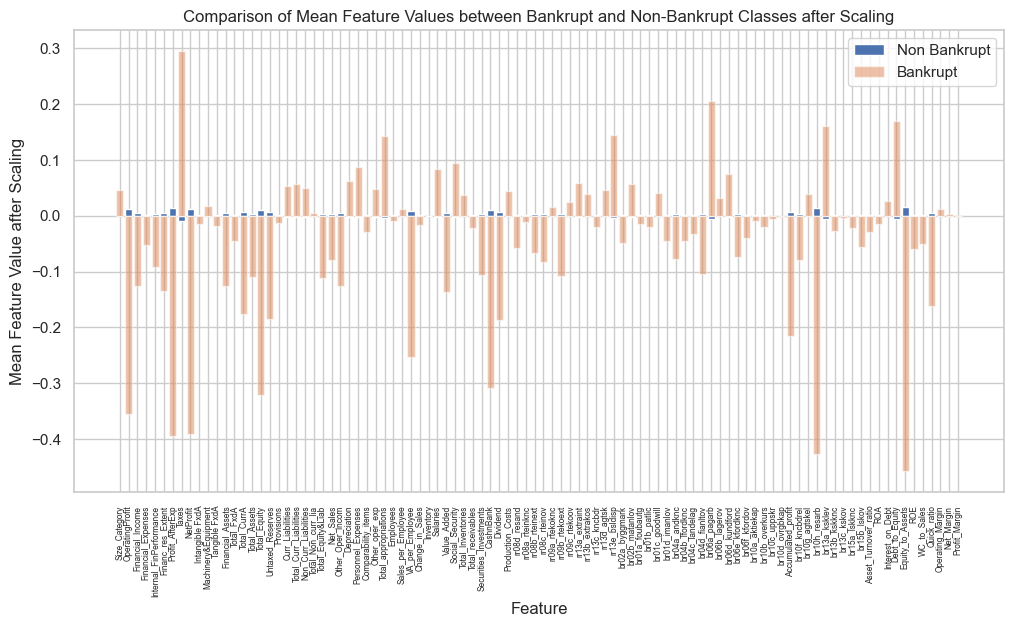

In [240]:
plt.figure(figsize=(12, 6))
plt.bar(bankrupt_mean.T.index, bankrupt_mean[:0].values.flatten(), label='Non Bankrupt', alpha=1)
plt.bar(bankrupt_mean.T.index, bankrupt_mean[1:].values.flatten(), label='Bankrupt', alpha=0.5)

plt.xticks(rotation=90, fontsize=6) 
plt.xlabel('Feature')
plt.ylabel('Mean Feature Value after Scaling')
plt.title('Comparison of Mean Feature Values between Bankrupt and Non-Bankrupt Classes after Scaling')
plt.legend()
plt.show()

After examining this, I have observed that on average, restaurants that experience bankruptcy have large business sizes but insufficient profits. Additionally, they face high tax costs. Furthermore, nearly all parameters exhibit an inverse relationship compared to non-bankrupt businesses.

In [237]:
from ipywidgets import interact
import ipywidgets as widgets
def plot_box(feature):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Bankrupt', y=feature, data=data_group, palette='Set2')
    plt.title(f'Box Plot for {feature}')
    plt.xlabel('Bankrupt')
    plt.ylabel('Value')
    plt.show()

# Creating a widget slider
feature_slider = widgets.SelectionSlider(options=data_group.columns[3:], value=data_group.columns[3], description='Feature')

# Creating an interactive function with the slider
interact(plot_box, feature=feature_slider)


interactive(children=(SelectionSlider(description='Feature', options=('Size_Category', 'OperatingProfit', 'Fin…

<function __main__.plot_box(feature)>

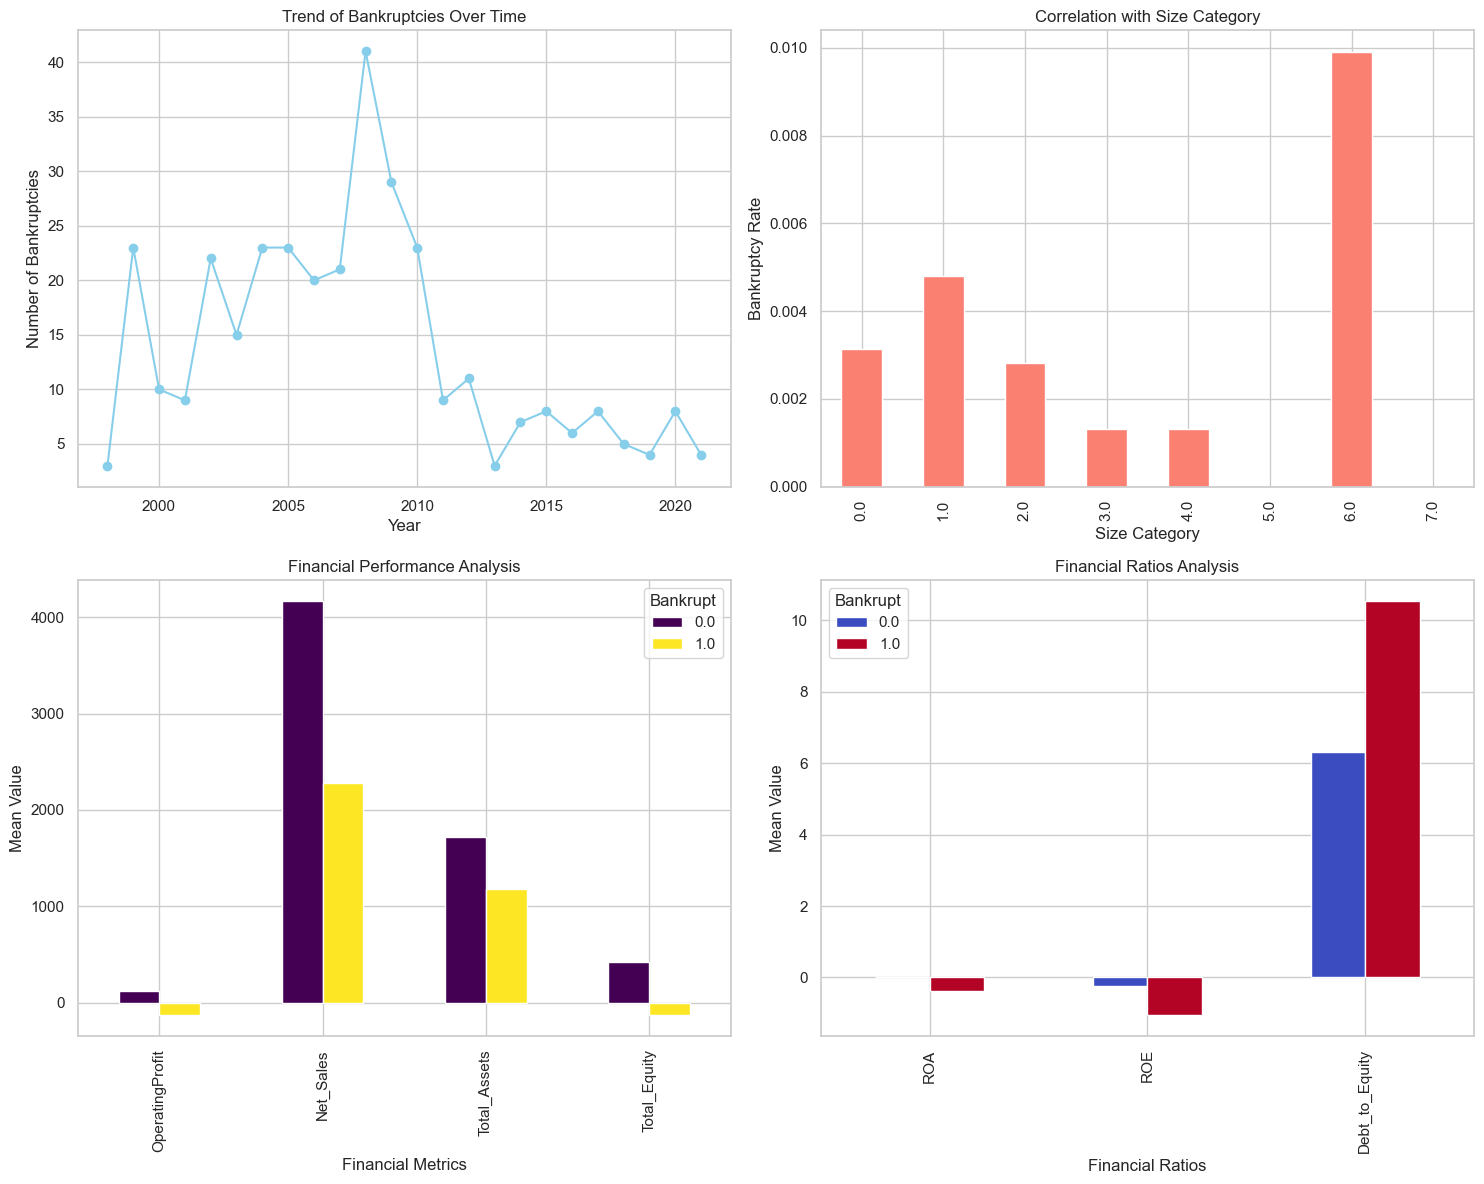

In [236]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# 1. Trend of Bankruptcies Over Time
bankruptcy_trend = datan.groupby('Year')['Bankrupt'].sum()
axes[0, 0].plot(bankruptcy_trend.index, bankruptcy_trend.values, marker='o', color='skyblue')
axes[0, 0].set_title('Trend of Bankruptcies Over Time')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of Bankruptcies')

# 2. Correlation with Size Category
size_correlation = datan.groupby('Size_Category')['Bankrupt'].mean()
size_correlation.plot(kind='bar', ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Correlation with Size Category')
axes[0, 1].set_xlabel('Size Category')
axes[0, 1].set_ylabel('Bankruptcy Rate')

# 4. Financial Performance Analysis
financial_columns = ['OperatingProfit', 'Net_Sales', 'Total_Assets', 'Total_Equity']
financial_performance_analysis = datan.groupby('Bankrupt')[financial_columns].mean()
financial_performance_analysis.T.plot(kind='bar', ax=axes[1, 0], cmap='viridis')
axes[1, 0].set_title('Financial Performance Analysis')
axes[1, 0].set_xlabel('Financial Metrics')
axes[1, 0].set_ylabel('Mean Value')

# 5. Financial Ratios Analysis

# Use a list to specify the columns for grouping
ratios_analysis = datan.groupby('Bankrupt')[['ROA', 'ROE', 'Debt_to_Equity']].mean()
ratios_analysis.T.plot(kind='bar', ax=axes[1, 1], cmap='coolwarm')
axes[1, 1].set_title('Financial Ratios Analysis')
axes[1, 1].set_xlabel('Financial Ratios')
axes[1, 1].set_ylabel('Mean Value')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


Classification with Machine Learning

In [247]:
data_group['Bankrupt'].value_counts()

0.0    10361
1.0      335
Name: Bankrupt, dtype: int64

The dataset I have exhibits an imbalance between the bankrupt classes. This imbalance may lead to machine learning models inadequately capturing the classification for the imbalanced data

In [370]:
#drop class feature except bankrupt class
data_group = data_group.drop(['ZipCode','Municipality'], axis = 1)

#Define Variable Target & Feature
X = data_group.drop('Bankrupt', axis = 1)
y = data_group['Bankrupt']

train_size = int(len(X)*0.8)
X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]
X_test = X.iloc[train_size:]
y_test = y.iloc[train_size:]

In [318]:
np.unique(y_pred_lgb,return_counts=True)

(array([0., 1.]), array([2087,   53], dtype=int64))

Model: lgbmclassifier with smoteenn
              precision    recall  f1-score   support

         0.0       0.97      0.83      0.89      2060
         1.0       0.07      0.31      0.11        80

    accuracy                           0.81      2140
   macro avg       0.52      0.57      0.50      2140
weighted avg       0.94      0.81      0.86      2140



Model: lgbmclassifier with smotetomek
              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93      2060
         1.0       0.07      0.23      0.11        80

    accuracy                           0.86      2140
   macro avg       0.52      0.56      0.52      2140
weighted avg       0.93      0.86      0.89      2140



Model: lgbmclassifier with smote
              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92      2060
         1.0       0.06      0.19      0.09        80

    accuracy                           0.86      2140
   macro avg     

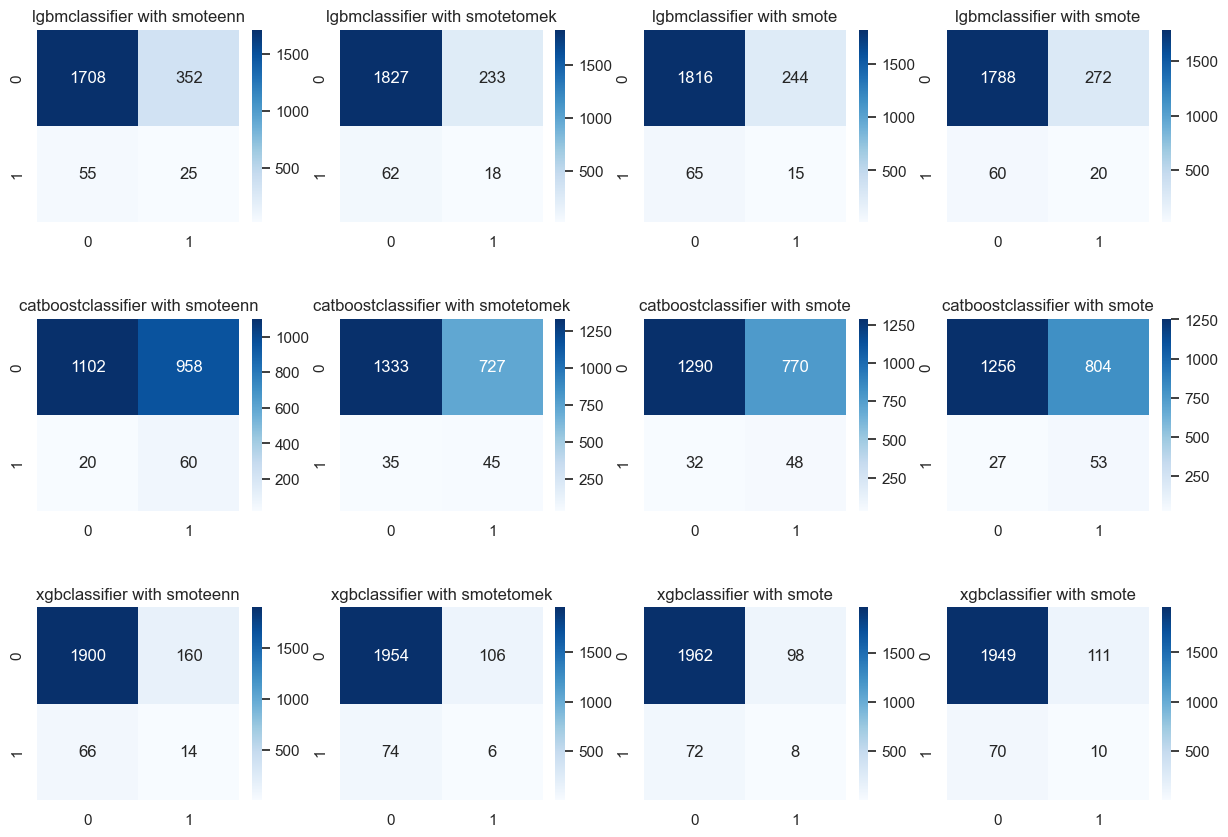

In [419]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from imblearn.pipeline import make_pipeline
from sklearn.metrics import classification_report


enn = EditedNearestNeighbours()
smote = SMOTE(random_state=42)
xgb_model = XGBClassifier(scale_pos_weight=len(y_train)/sum(y_train), random_state=42)
cb = CatBoostClassifier(class_weights=[1, len(y_train)/sum(y_train)], random_state=42, verbose = False)
lgb = LGBMClassifier(scale_pos_weight=len(y_train)/sum(y_train), random_state=42, verbose = -1)
sme = SMOTEENN(random_state=42)
smt = SMOTETomek(random_state=42)

models_combinations = [
    (sme, lgb),
    (smt, lgb),
    (smote, lgb),
    (enn, smote, lgb),
    (sme, cb),
    (smt, cb),
    (smote, cb),
    (enn, smote, cb),
    (sme, xgb),
    (smt, xgb),
    (smote, xgb),
    (enn, smote, xgb),
]

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for i, combination in enumerate(models_combinations):
    # Unpack the combination
    resampling = combination[:-1]  # All elements except the last one
    model = combination[-1]        # The last element
    
    # Create pipeline
    model_pipeline = make_pipeline(*resampling, model)
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    
    # Model Evaluation
    print(f"Model: {model_pipeline.steps[-1][0]} with {model_pipeline.steps[-2][0]}")
    print(classification_report(y_test, y_pred))
    print("\n" + "="*50 + "\n")
    
    # Plot confusion matrix
    ax = axes[i // 4, i % 4]
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"{model_pipeline.steps[-1][0]} with {model_pipeline.steps[-2][0]}")

plt.show()

I have tried several model configurations to address the imbalanced class issue (resampling), and weighting has been applied to the model, taking into account the class ratios. However, the results displayed do not seem to be satisfactory. There is no model that performs exceptionally well here. The higher the prediction score for class 1, the lower the accuracy. This is due to the significant imbalance ratio in the data, which is too large to overcome.